# CS350 Homework 4 EVAL

## a)

My machine has 8 CPUs. To illustrate, when I code `cat /proc/cpuinfo` in my terminal, I get the following result.

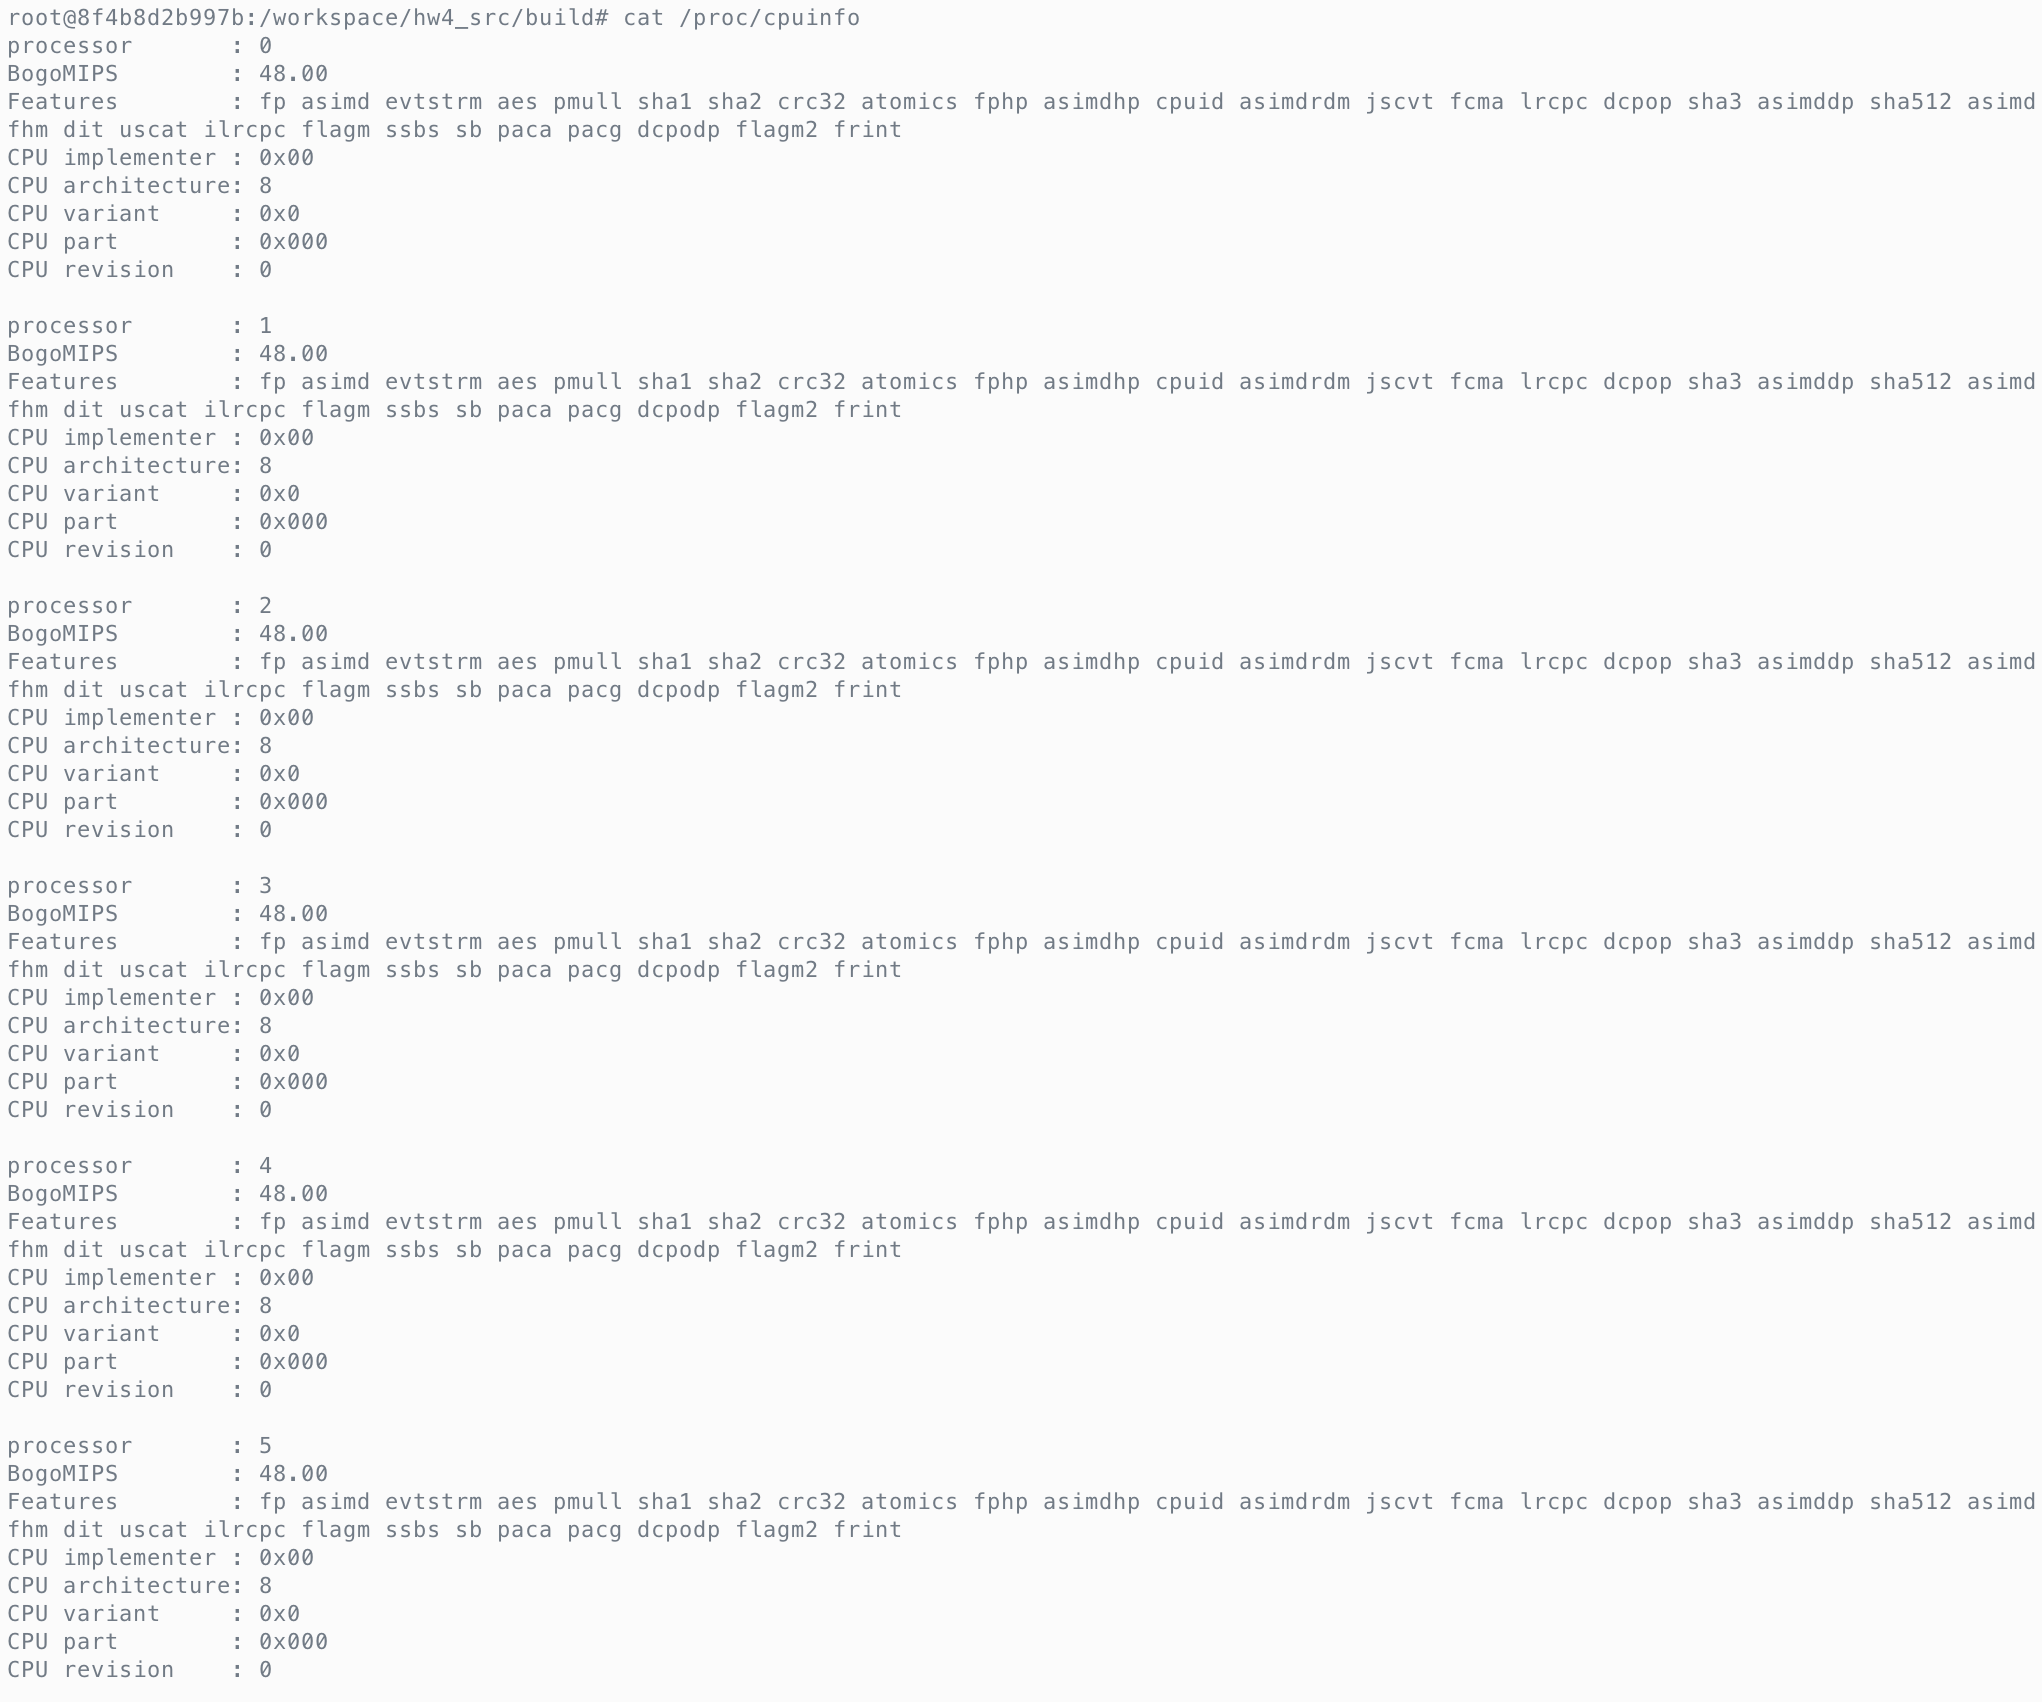

## b)

The utilization of `T0` and `T1` is relatively similar. And thus we can conclude that the load is balanced between them.

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import uniform
import math

def get_worker_task_ls(path):
    with open(path, 'r') as file:
        worker_dict = {}
        for line in file:
            if line[0] == 'T':
                thread_id = line[0:2]
                data = line.strip().split(' ')[1].split(':')[1].split(',')
                if thread_id in worker_dict:
                    worker_dict[thread_id].append(data)
                else:
                    worker_dict[thread_id] = []
                    worker_dict[thread_id].append(data)
    return worker_dict

def compute_utilization(req_ls):
    request_ls = req_ls
    total_t = (float)(request_ls[-1][-1]) - (float)(request_ls[0][-2])
    busy_t = 0
    for j in range(len(request_ls)):
        busy_t += (float)(request_ls[j][4]) - (float)(request_ls[j][3])
    utilization = busy_t / total_t
    return utilization

path = './data/server_multi_b2.txt'
worker_dict = get_worker_task_ls(path)
worker_name = worker_dict.keys()
print("|Thread ID|  Utilization  \t |")
print('-'*34)
for worker in worker_name:
    # print(worker_dict[worker])
    res = compute_utilization(worker_dict[worker])
    print(f"|{worker}\t  |  {res}  |")

|Thread ID|  Utilization  	 |
----------------------------------
|T0	  |  0.9087165491781471  |
|T1	  |  0.9089775507310952  |


## c)

The improvement in response time is super-linear as the number of threads increases.



-w param	utilization
----------------------------------
2		0.2669949946666675
4		0.05787127396774789
6		0.054424227332075435
8		0.054252284654105705


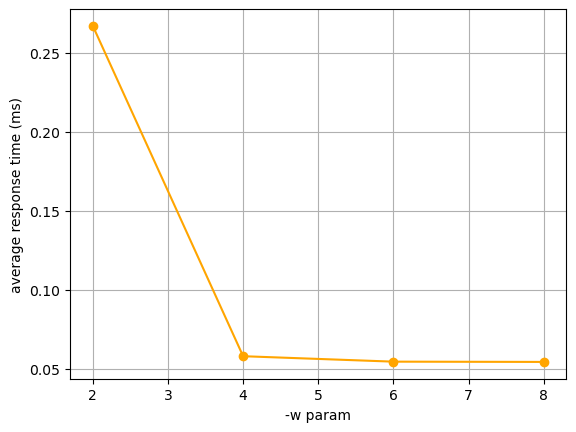

In [4]:
def get_req_ls(name, i, j):
    req_ls = []
    for index in range(i, j+1, 2):
        path = name + (str(index) + ".txt")
        request_ls = []
        with open(path, 'r') as file:
            for line in file:     
                if line[0] == 'T':
                    ls = line.strip().split(' ')[1].split(':')[1].split(',')
                    request_ls.append(ls) 
        req_ls.append(request_ls)
    return req_ls

def compute_avg_resp(req_ls):
    res = []
    for i in range(len(req_ls)):
        request_ls = req_ls[i]
        sum_resp = 0
        num_resp = len(request_ls)
        avg_resp = 0
        for j in range(len(request_ls)):
            sum_resp += (float)(request_ls[j][4]) - (float)(request_ls[j][0])
        avg_resp = sum_resp / num_resp
        res.append(avg_resp)
    return res

name = './data/server_multi_b'
req_ls = get_req_ls(name, 2, 8)
x_axis = np.array([2,4,6,8])

resp_avg_ls = np.array(compute_avg_resp(req_ls))
print("-w param\tutilization")
print('-'*34)
for i in range(len(resp_avg_ls)):
    print(f"{i*2+2}\t\t{resp_avg_ls[i]}")
plt.plot(x_axis,resp_avg_ls, color='orange', marker='o')
plt.xlabel('-w param')
plt.ylabel('average response time (ms)')
plt.grid()
plt.show()

# ./server_multi -q 1000 -w 8 2222 > ../data/server_multi_b8.txt & ./client -a 37 -s 20 -n 1500 -d 0 2222 > ../data/client_multi_b8.txt

## d)

The statement is false. To illutrate, when `-w param` is `1`, the rejection ratio `X1` is 0.0346. When `-w param` is `2`, the rejection ratio `X2` should be `X1`/2 = 0.0173. However, that contradicts with the result that `X2` is 0. Thus, we can conclude that the statement is incorrect.

In [5]:
def plot_irt(name, i, j):
    for x in range(i, j+1):
        path = name + str(x)+'.txt'
        rej_requests = []
        with open(path, 'r') as file:
            for line in file:     
                if line[0] == 'X':
                    rej_tsc = (float)(line.split(':')[1].split(',')[-1])
                    rej_requests.append(rej_tsc)   
                    
        print("*"*10+f" -w param: {x} "+ "*"*10)
        # calculate reject ratio
        rej_ratio = len(rej_requests)/ 1500.0
        print("reject ratio is: ", rej_ratio)

        # plot inner-rejection time
        if len(rej_requests) != 0:
            inner_rej_times = np.zeros(len(rej_requests)-1)
            for i in range(len(rej_requests)-1):
                inner_time = rej_requests[i+1] - rej_requests[i]
                inner_rej_times[i] = inner_time
            print(f'Number of rejected requests: {len(rej_requests)}')
        else:
            print(f"Number of rejected requests: {0}")
        print()

name = './data/server_multi_d'
plot_irt(name, 1, 2)

********** -w param: 1 **********
reject ratio is:  0.034666666666666665
Number of rejected requests: 52

********** -w param: 2 **********
reject ratio is:  0.0
Number of rejected requests: 0

